#  <span style='color:Blue'> An Exploratory Analysis of Venues in Cabarrus County, NC - A Charlotte Metropolitan Surburb </span>
### <span style='color:Blue'> ----Venues Comparison for 2 Popular Zip Code Areas in the City of Concord </span>

<div class="alert alert-block alert-info">
<b>Coursera Capstone Project.</b> 
</div>



In [768]:
# Import libraries and dependencies for the project
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


In [769]:
# Downloaded NC_Master_Address_Dataset_-_2014_CAB.csv from https://www.nconemap.gov/datasets/nc-master-address-dataset-2014/geoservice. 
# The dataset will have zip code information along with such information as address, county name etc for all addresses in the state of North Carolina of USA.

data1 = pd.read_csv("NC_Master_Address_Dataset_-_2014_CAB.csv")
print("shape of data1 is:", data1.shape)
data1.head()

shape of data1 is: (90543, 28)


,X,Y,OBJECTID,ENTRY_ID,ADDR_HN,ADDR_PD,ADDR_PT,ADDR_SN,ADDR_ST,ADDR_SD,FULL_ADDRESS,SUB_HN,APT_UNIT,RES_TYPE,COMMUNITY,ZIPCODE,PO_NAME,STATE,COUNTY_NAME,FIPS,STATE_ID,COORSYS,POINT_X,POINT_Y,USNG,DDLat,DDLon,PROCESS_ID
0,1.514961e+06,616911.476343,453431,CABARRUSADDRESSPOINTS2,1602,NaN,NaN,CARALEA VALLEY,DRIVE,NORTHWEST,1602 CARALEA VALLEY DRIVE NORTHWEST,NaN,,NaN,NaN,28027,NaN,NC,CABARRUS,25,37,2264,1.514961e+06,616911.476343,17S NV 33728 21254,35.43415N,080.62841W,A
1,1.528647e+06,605532.000415,453432,CABARRUSADDRESSPOINTS4,142,NaN,NaN,CHESTNUT,DRIVE,SOUTHWEST,142 CHESTNUT DRIVE SOUTHWEST,NaN,,NaN,NaN,28025,NaN,NC,CABARRUS,25,37,2264,1.528647e+06,605532.000415,17S NV 37968 17871,35.40350N,080.58186W,A
2,1.533665e+06,600705.697403,453433,CABARRUSADDRESSPOINTS5,726,NaN,NaN,SPRING,ST,SOUTHWEST,726 SPRING STREET SOUTHWEST,NaN,,NaN,NaN,28025,NaN,NC,CABARRUS,25,37,2264,1.533665e+06,600705.697403,17S NV 39526 16431,35.39046N,080.56477W,A
3,1.538479e+06,607313.361025,453434,CABARRUSADDRESSPOINTS6,540,NaN,NaN,TRIPOLIS,ST,SOUTHEAST,540 TRIPOLIS STREET SOUTHEAST,NaN,,NaN,NaN,28025,NaN,NC,CABARRUS,25,37,2264,1.538479e+06,607313.361025,17S NV 40952 18474,35.40882N,080.54896W,A
4,1.486521e+06,608832.312383,453435,CABARRUSADDRESSPOINTS7,295,NaN,NaN,BLACKBERRY,TRAIL,NaN,295 BLACKBERRY TRAIL,NaN,,NaN,NaN,28027,NaN,NC,CABARRUS,25,37,2264,1.486521e+06,608832.312384,17S NV 25113 18618,35.41064N,080.72340W,A


In [770]:
# Explore dataframe data1, checking unique vaule counts of column RES_TYPE.
item_counts = data1['RES_TYPE'].value_counts(normalize=False)
print(item_counts)

Series([], Name: RES_TYPE, dtype: int64)


In [771]:
# Explore dataframe data1, checking unique vaules of column PO_NAME.
data1.PO_NAME.unique()

array([nan])

In [772]:
# Explore dataframe data1, checking unique vaules of column ZIPCODE.
data1.ZIPCODE.unique()


array([28027, 28025, 28083, 28081, 28124, 28107, 28075, 28078, 28269,
       28071, 28036, 28097, 28215, 28138, 28262, 28213, 28227],
      dtype=int64)

In [773]:
# Get all the unique values of ZIPCODE.
# Change ZIPCODE unique values into a dataframe zipcode.
postalcode = data1.ZIPCODE.unique()
zipcode = pd.DataFrame(postalcode)
zipcode.columns = ['ZIPCODE']
print("Unique zip codes in Cabarrus County, North Carolina are: ", zipcode.shape)
print(type(zipcode))
print(zipcode.dtypes)
zipcode

Unique zip codes in Cabarrus County, North Carolina are:  (17, 1)
<class 'pandas.core.frame.DataFrame'>
ZIPCODE    int64
dtype: object


,ZIPCODE
0,28027
1,28025
2,28083
3,28081
4,28124
5,28107
6,28075
7,28078
8,28269
9,28071


In [774]:
# change ZIPCODE column to object
zipcode.astype({'ZIPCODE': 'object'}).dtypes

ZIPCODE    object
dtype: object

In [775]:
# Get latitude and longitude data for each zipcode in the dataframe.
# Install library pgeocode.
# Use zip code 28027 as an example to check the output of a pgeocode request.
! pip install pgeocode
import pgeocode
nomi = pgeocode.Nominatim('us')
nomi.query_postal_code("28027")


postal_code                28027
country_code                  US
place_name               Concord
state_name        North Carolina
state_code                    NC
county_name             Cabarrus
county_code                   25
community_name               NaN
community_code               NaN
latitude                 35.4141
longitude               -80.6162
accuracy                       4
Name: 0, dtype: object

In [776]:
# Loop through the ZIPCODE column of dataframe zip codes to create 3 data series, namely lat, long, and city. 
# Examine the data series to check for the latitudes, longitudes, and place_name (i.e., city).
lat = []
long = []
city = []
for code in zipcode['ZIPCODE']:
    geo = nomi.query_postal_code(code)
    latitude = geo.latitude
    longitude = geo.longitude
    place_name = geo.place_name
    lat.append(latitude)
    long.append(longitude)
    city.append(place_name)
print(lat)
print(long)
print(city)

[35.4141, 35.3716, 35.4848, 35.50199999999999, 35.4146, 35.2477, 35.3247, 35.4011, 35.2886, 35.5498, 35.4858, 35.2704, 35.244, 35.5494, 35.3183, 35.2836, 35.1936]
[-80.6162, -80.53, -80.6015, -80.6359, -80.4171, -80.5319, -80.6594, -80.8695, -80.8209, -80.3346, -80.794, -80.4211, -80.7387, -80.4226, -80.7476, -80.7638, -80.6846]
['Concord', 'Concord', 'Kannapolis', 'Kannapolis', 'Mount Pleasant', 'Midland', 'Harrisburg', 'Huntersville', 'Charlotte', 'Gold Hill', 'Davidson', 'Locust', 'Charlotte', 'Rockwell', 'Charlotte', 'Charlotte', 'Charlotte']


In [777]:
# Add 3 new columns: Latitude, Longitude, and City for the dataframe zipcode.
# Populate the new columns with the data series lat, long and city from previous step.
# This dataframe will be the main dataframe for this project.
zipcode['Latitude'] = lat
zipcode['Longitude'] = long
zipcode['City'] = city
print(zipcode.dtypes)
cabarrus  = zipcode.copy()
cabarrus

ZIPCODE        int64
Latitude     float64
Longitude    float64
City          object
dtype: object


,ZIPCODE,Latitude,Longitude,City
0,28027,35.4141,-80.6162,Concord
1,28025,35.3716,-80.5300,Concord
2,28083,35.4848,-80.6015,Kannapolis
3,28081,35.5020,-80.6359,Kannapolis
4,28124,35.4146,-80.4171,Mount Pleasant
5,28107,35.2477,-80.5319,Midland
6,28075,35.3247,-80.6594,Harrisburg
7,28078,35.4011,-80.8695,Huntersville
8,28269,35.2886,-80.8209,Charlotte
9,28071,35.5498,-80.3346,Gold Hill


##  <span style='color:Blue'> Comparison of Venues Exploratory Analysis in the 2 Zip Code Areas 28027 vs. 28025 for the City of Concord, NC </span>

In [778]:
# Double-check and make sure ZIPCOODE column of the dataframe zipcode has data type of 'object'.
cabarrus = cabarrus.astype({"ZIPCODE": object})
print(cabarrus.dtypes)
print(type(cabarrus))

ZIPCODE       object
Latitude     float64
Longitude    float64
City          object
dtype: object
<class 'pandas.core.frame.DataFrame'>


In [779]:
# Use geolocator from geopy library to get the latitude and longitude values of Cabarrus County, North Carolina.
# The user agent "cabarrus_explorer will be created to query for the geo-coordinates.
# The geo-coordinates of the county will be used to generate a county map to show the distribution of zip code areas.

address = 'Cabarrus County, North Carolina'

geolocator = Nominatim(user_agent="cabarrus_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Cabarrus County North Carolina are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Cabarrus County North Carolina are 35.4045503, -80.564371.


In [780]:
# Create a map of Cabarrus County North Carolina using latitude and longitude values obtained from previous step.
# Superimpose different zip code areas on the county map.
# A data label of "zip-code, city-name" will appear once you click the blue dots of each zip code area marker.

map_cabarrus = folium.Map(location=[latitude,longitude], zoom_start=10)

# Add markers of ZIPCODE and city name to map.
for row in cabarrus.itertuples():
    label = '{},{}'.format(row.ZIPCODE, row.City)
    label = folium.Popup(label, parse_html=True)
    lat = row.Latitude
    lng = row.Longitude
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#cc3139',
        fill_opacity=1.0,
        parse_html=False).add_to(map_cabarrus)  

map_cabarrus
 

## <span style='color:Blue'>We are going to explore city of Concord in detail due to the following reasons:</span>
### <span style='color:Blue'> 1. Concord is the county seat and the largest city in Cabarrus County.</span>
### <span style='color:Blue'> 2. Concord has the second-largest population in the Charlotte metropolitan area and is the 10th most populous city in North Carolina.</span>
### <span style='color:Blue'> 3. Concord is the home to some of North Carolina's top tourist destinations, including NASCAR's Charlotte Motor Speedway and Concord Mills Mall.</span>

<div class="alert alert-block alert-info">
<b>Explore Venues in the City of Concord, NC.</b> 
</div>

## <span style='color:red'>Next, we are going to start utilizing the Foursquare API to explore the 2 zip code areas in Concord, NC, compare and contrast the venue types and numbers in these 2 zip code locations.</span> 


##  <span style='color:Blue'> Explore Venues in Zip Code 28027 Area - City of Concord, NC </span>

# #### Define Foursquare Credentials and Version

In [781]:
# Foursquare credentials, version and limit of venues to return
CLIENT_ID = '53VC3GELCTKVYUTYUPS5LEPKTPJNL0JBFKCMX4J2YS5J5SQL' # your Foursquare ID
CLIENT_SECRET = 'WJGRNYIJATYAOGYBDKTFCUKHD1WPF10N5YIFDIA4Y512M1YN' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value


In [782]:
# Explore zip code 28027
# Create Get request URL.
# Zip code 28027 has an area of 68.60 square miles of land area, estimated radius is ~7522 meter assuming a round area.
# Set radius to 2000 as an approximate value to cover the area.

latitude = cabarrus.loc[0, 'Latitude']
longitude = cabarrus.loc[0, 'Longitude']
radius = 2000
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
print(url)

https://api.foursquare.com/v2/venues/explore?&client_id=53VC3GELCTKVYUTYUPS5LEPKTPJNL0JBFKCMX4J2YS5J5SQL&client_secret=WJGRNYIJATYAOGYBDKTFCUKHD1WPF10N5YIFDIA4Y512M1YN&v=20180605&ll=35.4141,-80.6162&radius=2000&limit=100


In [783]:
# Send the GET request and examine the results for zip 28027 area.
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ff90d90b16446703b211ccd'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Concord',
  'headerFullLocation': 'Concord',
  'headerLocationGranularity': 'city',
  'totalResults': 38,
  'suggestedBounds': {'ne': {'lat': 35.432100018000014,
    'lng': -80.59415492534362},
   'sw': {'lat': 35.39609998199998, 'lng': -80.6382450746564}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5481e75e498ed2ba51dcc979',
       'name': 'The Smoke Pit',
       'location': {'address': '796-10 Concord Pkwy N',
        'crossStreet': 'Faggart',
        'lat': 35.421965049767635,
        'lng': -80.61455917514043,
        'lab

In [784]:
#  Define the get_category_type function from the Foursquare lab. (Ref: lab of the Capstone Course.)
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [785]:
# Clean the json file and structure into a pandas dataframe. (Ref: lab of the Capstone Course.)
# First extract venues information into a new json format venues.
# Write the venues json file into a new pandas dataframe nearby_venues.
# The dataframe nearby_venues will have 4 columns: name, categories, lat, and lng to store venue name, venue categorie, and venue latitudes and longitudes.

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

<ipython-input-785-288828e853c6>:8: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


,name,categories,lat,lng
0,The Smoke Pit,BBQ Joint,35.421965,-80.614559
1,The Depot Antique and Designer Mall,Shopping Mall,35.414700,-80.603026
2,Cabarrus Brewing Co.,Brewery,35.414246,-80.603316
3,High Branch Brewing Co.,Brewery,35.414306,-80.603357
4,Sonic,Fast Food Restaurant,35.403428,-80.608745
5,Punchy's Diner,Diner,35.413463,-80.612312
6,QuikTrip,Convenience Store,35.428672,-80.609508
7,Fiesta Mexicana,Mexican Restaurant,35.428205,-80.608472
8,Lowe's,Hardware Store,35.426144,-80.612610
9,BP,Gas Station,35.413560,-80.614920


In [786]:
nearby_venues.dtypes

name           object
categories     object
lat           float64
lng           float64
dtype: object

In [787]:
# Change datatypes of columns name and categories to str so that they could be used as labels on the map. 
nearby_venues = nearby_venues.astype({"name": str, "categories": str})


In [788]:
# # Create a map of zip code 28027 area of North Carolina using latitude and longitude values obtained from previous step.
# Superimpose different zip code areas on the county map.
# A data label of "zip-code, city-name" will appear once you click the blue dots of each zip code area marker.

map_28027 = folium.Map(location=[cabarrus.loc[0, 'Latitude'],cabarrus.loc[0, 'Longitude']], zoom_start=14)

# Add markers of ZIPCODE and city name to map.
for row in nearby_venues.itertuples():
    label = '{},{}'.format(row.name, row.categories)
    label = folium.Popup(label, parse_html=True)
    lat = row.lat
    lng = row.lng
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#cc3139',
        fill_opacity=1.0,
        parse_html=False).add_to(map_28027)  

map_28027

In [789]:
# Check the total number of venues returned for zip code area 28027.
# Number limit is 100 if there are more than 100 venues returned.
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

38 venues were returned by Foursquare.


In [790]:
# Check for venue category value counts for zip code area 28027.
nearby_venues['categories'].value_counts()


Fast Food Restaurant      4
Mexican Restaurant        3
Diner                     3
Rental Car Location       2
Food Truck                2
Brewery                   2
Gas Station               2
Shopping Mall             2
Convenience Store         2
Hardware Store            1
Antique Shop              1
Furniture / Home Store    1
Discount Store            1
Auto Garage               1
BBQ Joint                 1
Supermarket               1
Ice Cream Shop            1
Hot Dog Joint             1
Pharmacy                  1
Spa                       1
Fried Chicken Joint       1
Asian Restaurant          1
Sandwich Place            1
Pizza Place               1
Big Box Store             1
Name: categories, dtype: int64

In [791]:
venue_28027 = pd.DataFrame(nearby_venues['categories'].value_counts())

venue_28027.head

<bound method NDFrame.head of                         categories
Fast Food Restaurant             4
Mexican Restaurant               3
Diner                            3
Rental Car Location              2
Food Truck                       2
Brewery                          2
Gas Station                      2
Shopping Mall                    2
Convenience Store                2
Hardware Store                   1
Antique Shop                     1
Furniture / Home Store           1
Discount Store                   1
Auto Garage                      1
BBQ Joint                        1
Supermarket                      1
Ice Cream Shop                   1
Hot Dog Joint                    1
Pharmacy                         1
Spa                              1
Fried Chicken Joint              1
Asian Restaurant                 1
Sandwich Place                   1
Pizza Place                      1
Big Box Store                    1>

In [792]:
venue_28027.reset_index
venue_28027.head()

,categories
Fast Food Restaurant,4
Mexican Restaurant,3
Diner,3
Rental Car Location,2
Food Truck,2


In [793]:
venue_28027.index.name = 'venue_category'
venue_28027.columns = ['venue_counts']
venue_28027.head()

,venue_counts
venue_category,
Fast Food Restaurant,4
Mexican Restaurant,3
Diner,3
Rental Car Location,2
Food Truck,2


In [794]:
venue_28027 = venue_28027.reset_index()
venue_28027.head()

,venue_category,venue_counts
0,Fast Food Restaurant,4
1,Mexican Restaurant,3
2,Diner,3
3,Rental Car Location,2
4,Food Truck,2


In [795]:
venue_28027.columns = ['venue_category','venue_counts']
venue_28027.head()

,venue_category,venue_counts
0,Fast Food Restaurant,4
1,Mexican Restaurant,3
2,Diner,3
3,Rental Car Location,2
4,Food Truck,2


In [796]:
print("The size of the venue category dataframe is: ", venue_28027.shape)

The size of the venue category dataframe is:  (25, 2)


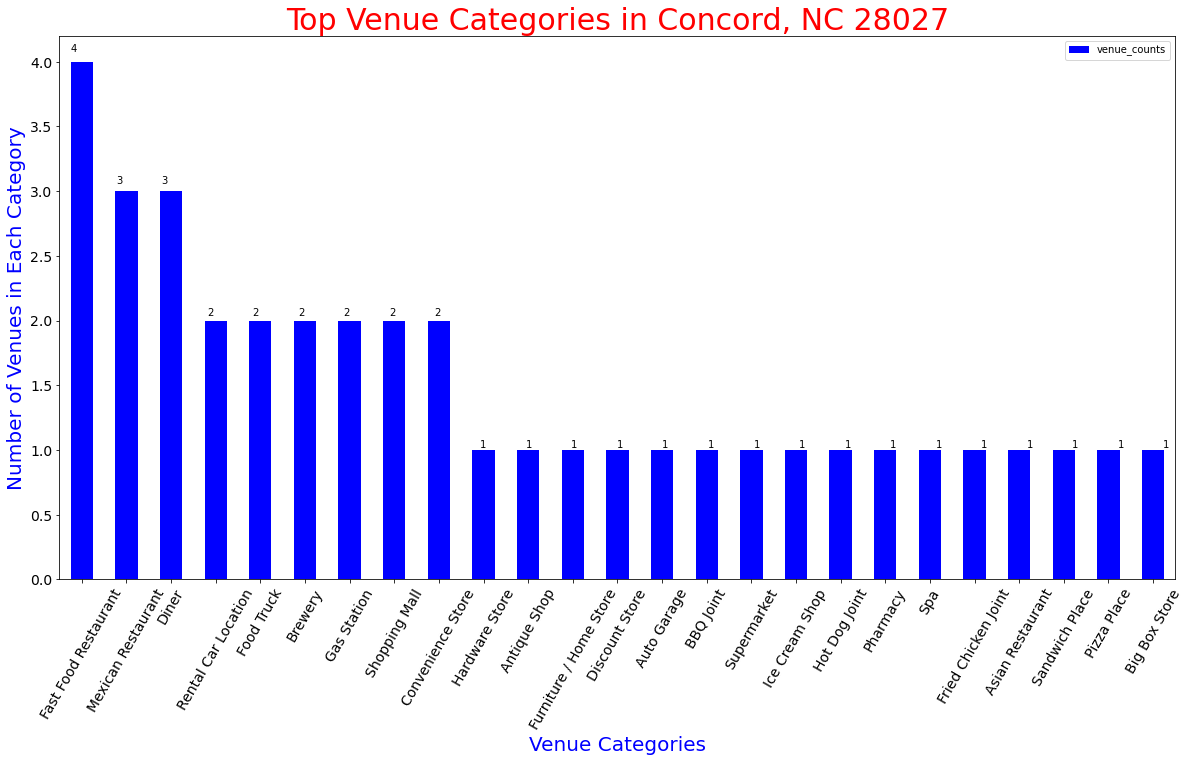

In [797]:
# Plot a bar chart of the venue counts vs. category data for zip code 28027 area to visualize distribution of venues.
ax = venue_28027.plot.bar(x='venue_category', y='venue_counts', 
                   rot=0, 
                   color="blue", 
                   figsize=(20,10)
                   
                   )
ax.set_xlabel("Venue Categories", fontsize=20, color='blue')
ax.set_ylabel("Number of Venues in Each Category", fontsize=20, color='blue')
ax.set_title('Top Venue Categories in Concord, NC 28027', fontsize=30, color='red')
ax.tick_params(axis="x", rotation=60, labelsize=14)
ax.tick_params(axis="y", labelsize=14)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))
ax

# Observations of venues in zip code 28027 area
#1. A total of 41 venues were returned by foursquare.com.
#2. There are 26 categories of venues for the 41 returned venue names.
#3. Fast Food Restaurant, Diner, and Meican Restaurant are among the top 3 categories of venues, accounts for 1 quarter of total returned venues.
#4. Other popular venues include Convenience Store, Brewery, Gas Station, Car Rental, Ice Cream Shop, Shopping Mall, etc.
#5. In general, there are a great variety of venues in this zip code area.

##  <span style='color:Blue'> Explore Venues in Zip Code 28025 Area - City of Concord, NC </span>

In [798]:
# Explore zip code 28025 of the city of Concord in Cabarrus county, North Carolina.
# Create Get request namely url1.
# Query venue information, clean up json structured results and write into a new dataframe nearby_venues_1.
# Zip code 28025 has area of around 108.9 square miles, which coresponds to ~9477 meter radius assuming round area shape.
# So set radius as 9000.
latitude = cabarrus.loc[1, 'Latitude']
longitude = cabarrus.loc[1, 'Longitude']
radius = 2000
url_1 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
print(url_1)

# Send the GET request and examine the results.
results_1 = requests.get(url_1).json()
results_1

# Clean the json file and structure into a pandas dataframe.

venues_1 = results_1['response']['groups'][0]['items']
    
nearby_venues_1 = json_normalize(venues_1) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_1 = nearby_venues_1.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_1['venue.categories'] = nearby_venues_1.apply(get_category_type, axis=1)

# clean columns
nearby_venues_1.columns = [col.split(".")[-1] for col in nearby_venues_1.columns]

print('{} venues were returned by Foursquare.'.format(nearby_venues_1.shape[0]))


nearby_venues_1

https://api.foursquare.com/v2/venues/explore?&client_id=53VC3GELCTKVYUTYUPS5LEPKTPJNL0JBFKCMX4J2YS5J5SQL&client_secret=WJGRNYIJATYAOGYBDKTFCUKHD1WPF10N5YIFDIA4Y512M1YN&v=20180605&ll=35.3716,-80.53&radius=2000&limit=100
12 venues were returned by Foursquare.


<ipython-input-798-87da0ac4ff73>:27: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues_1 = json_normalize(venues_1) # flatten JSON


,name,categories,lat,lng
0,Brooklyn's Pizzeria,Pizza Place,35.370512,-80.548243
1,Food Lion Grocery Store,Supermarket,35.370149,-80.548096
2,Pizza Hut,Pizza Place,35.370409,-80.550117
3,China Garden Restaurant,Chinese Restaurant,35.370475,-80.548159
4,Bojangles' Famous Chicken 'n Biscuits,Fast Food Restaurant,35.370871,-80.548965
5,1st Place Turf LLC,Construction & Landscaping,35.371600,-80.530000
6,Tesh-Troxler Landscapes & Designs,Construction & Landscaping,35.371746,-80.513842
7,Brooklyn's Pizza,Pizza Place,35.370647,-80.548134
8,Southgate Commons Shopping Center,Market,35.370127,-80.548286
9,Swiftdogz,Pet Service,35.371082,-80.548411


In [799]:
(nearby_venues_1).dtypes

name           object
categories     object
lat           float64
lng           float64
dtype: object

In [800]:
# Make sure columns name and categories are both str type so that they may be used as labels for the map.
nearby_venues_1 = nearby_venues_1.astype({"name":str, "categories":str})


In [801]:
# # Create a map of zip code 28025 area of North Carolina using latitude and longitude values obtained from previous step.
# Superimpose different zip code areas on the county map.
# A data label of "zip-code, city-name" will appear once you click the blue dots of each zip code area marker.

map_28025 = folium.Map(location=[cabarrus.loc[1, 'Latitude'],cabarrus.loc[1, 'Longitude']], zoom_start=15)

# Add markers of ZIPCODE and city name to map.
for row in nearby_venues_1.itertuples():
    label = '{},{}'.format(row.name, row.categories)
    label = folium.Popup(label, parse_html=True)
    lat = row.lat
    lng = row.lng
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#cc3139',
        fill_opacity=1.0,
        parse_html=False).add_to(map_28025)  

map_28025

In [802]:
# Transform venue data from zip code 28025 similar to that of 28027.
venues_28025 = pd.DataFrame(nearby_venues_1['categories'].value_counts())
venues_28025

,categories
Pizza Place,3
Construction & Landscaping,2
Fast Food Restaurant,2
Supermarket,1
Pet Service,1
Chinese Restaurant,1
Market,1
Hunting Supply,1


In [803]:
# Name index column as venue_category.
venues_28025.index.name = 'venue_category'

In [804]:
# Name the number counts of venues as column 'venue_counts' instead of 'categories'.
venues_28025.columns = ['venue_counts']
venues_28025.head()

,venue_counts
venue_category,
Pizza Place,3
Construction & Landscaping,2
Fast Food Restaurant,2
Supermarket,1
Pet Service,1


In [805]:
# Reset index for the dataframe so tha both venue_category and venue_counts will be the columns of the dataframe.
venues_28025 = venues_28025.reset_index()
venues_28025.head

<bound method NDFrame.head of                venue_category  venue_counts
0                 Pizza Place             3
1  Construction & Landscaping             2
2        Fast Food Restaurant             2
3                 Supermarket             1
4                 Pet Service             1
5          Chinese Restaurant             1
6                      Market             1
7              Hunting Supply             1>

In [806]:
print("The size of the venue category dataframe is: ", venues_28025.shape)

The size of the venue category dataframe is:  (8, 2)


## Observations of venues in zip code 28025 area
#1. A total of 11 venues were returned by foursquare.com.
#2. There are 8 categories of venues for the 11 returned venue names.
#3. Pizza Place, Fast Food Restaurant, and Supermarket.
#4. The remaining venues are Pet Service, Chinese Restaurant, Construction & Landscaping, and Hunting Supply.
#5. It seems that both the categories and number counts of venues are scarce in this zip code area compared to those of 28027 area.
#6. Foursquare.com needs to update its database to include most if not all of the venues in that area. Given that the version is older, we could assume that the current version may have overcome this problem.

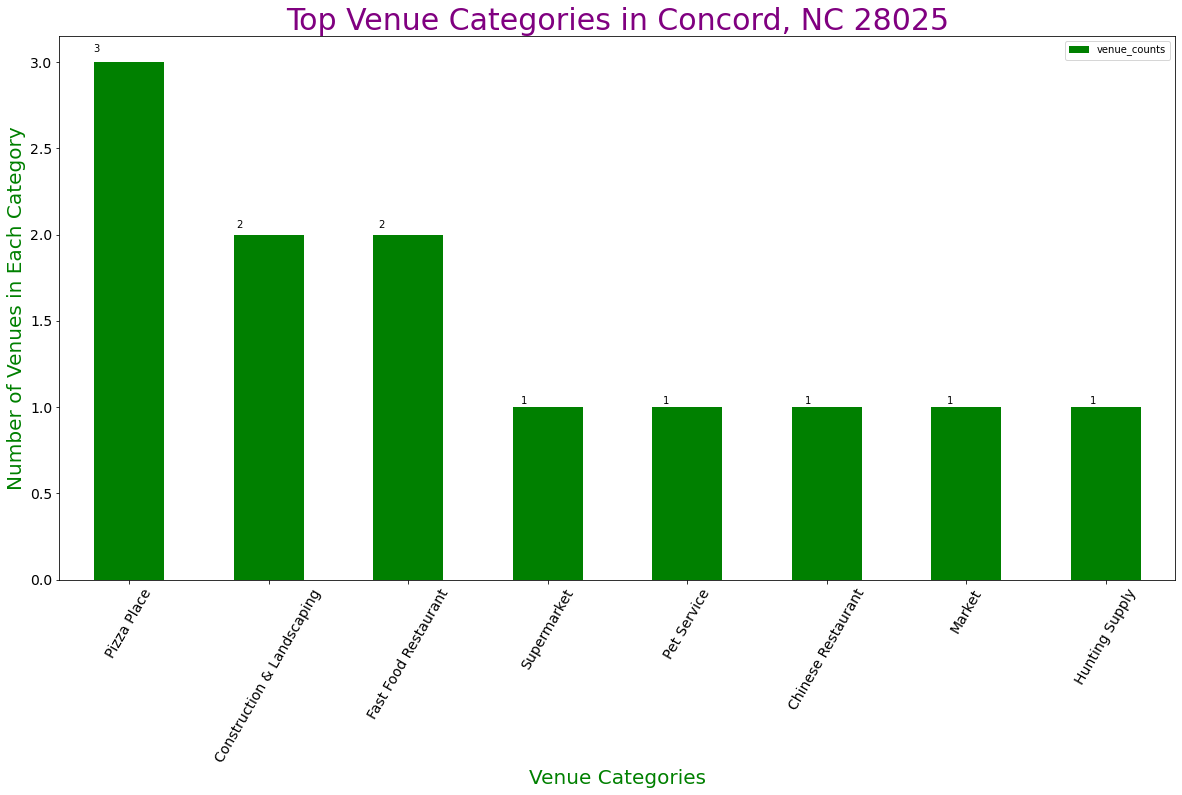

In [807]:
# Visualize the venues distribution in zip code 28025 area using bar chart.
ax = venues_28025.plot.bar(x='venue_category', y='venue_counts', 
                   rot=0, 
                   color="green", 
                   figsize=(20,10)
                   
                   )
ax.set_xlabel("Venue Categories", fontsize=20, color='green')
ax.set_ylabel("Number of Venues in Each Category", fontsize=20, color='green')
ax.set_title('Top Venue Categories in Concord, NC 28025', fontsize=30, color='purple')
ax.tick_params(axis="x", rotation=60, labelsize=14)
ax.tick_params(axis="y", labelsize=14)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))
ax

## <span style='color:Blue'> Summary  </span>
### <span style='color:Blue'>1. Under the chosen conditions, Zip code area 28027 has returned about 4 times more venue categories and number of venues than zip code area 28025. </span>
### <span style='color:Blue'> 2. 28027 area is the area of choice if you like to eat out and have more activities. </span>
### <span style='color:Blue'> 3. 28025 area best suits you if you look for less traffic, more quiet surroundings.</span>
